In [2]:
#import libraries
#write your code.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
#load data

#write your code
df=pd.read_csv('data.txt')
df.head()
X_train=df.iloc[:,:2].values
y_train=df.iloc[:,2].values

In [4]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#write your code
    # Separate the positive and negative examples
    positive =(y == 1)
    negative =(y == 0)

    # Plot positive examples
    plt.scatter(X[positive,0], X[positive,1], marker='+', color='b', label=positive_label)

    # Plot negative examples
    plt.scatter(X[negative, 0], X[negative, 1], marker='o', color='r', label=negative_label)

    # Set plot labels
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Visualization')
    plt.legend()
    plt.show()

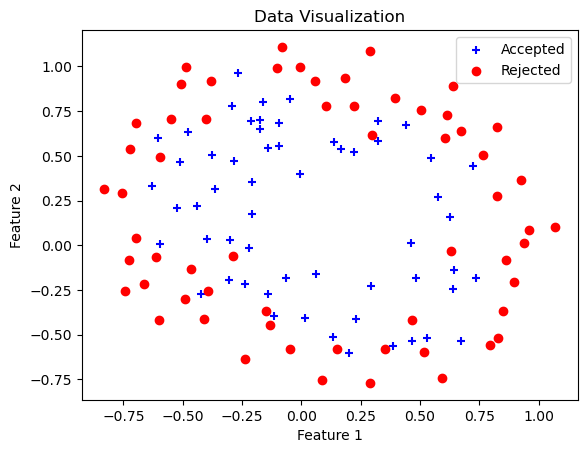

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


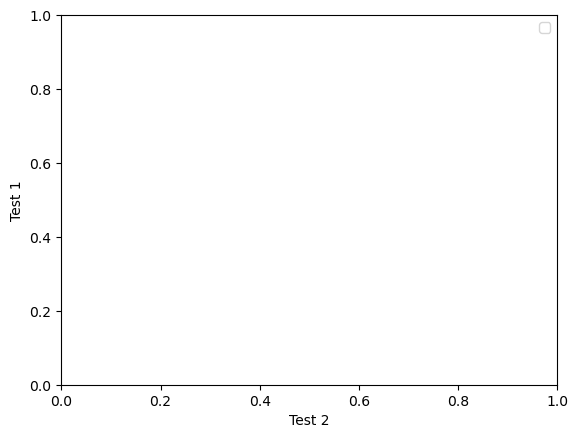

In [5]:
#test
plot_data(X_train, y_train, positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [6]:
#feature mapping
def map_feature(X1,X2):
#write your code
  X1=np.atleast_1d(X1)
  X2=np.atleast_1d(X2)
  degree=6
  out=[]
  for i in range(1,degree+1):
    for j in range(i+1):
      out.append((X1**(i-j) * (X2**j)))
  return np.stack(out, axis=1)


In [7]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (117, 2)
Shape after feature mapping: (117, 27)


In [8]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [9]:
#sigmoid function
def sigmoid(z):
#write your code
    return 1/(1+np.exp(-z))

In [10]:
sigmoid_test(sigmoid)


Tests passed!


In [11]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [12]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  m=X.shape[0]
  total_cost=0.0
  z_wb=np.dot(X,w)+b
  a=sigmoid(z_wb)
  total_cost=-(1/m)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))
  return total_cost

In [13]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.673
Tests passed!


In [14]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  m=X.shape[0]
  total_cost=0.0
  z_wb=np.dot(X,w)+b
  a=sigmoid(z_wb)
  total_cost=-(1/m)*np.sum(y*np.log(a)+(1-y)*np.log(1-a))+(lambda_/(2*m))*np.sum(w**2)
  return total_cost

In [15]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [16]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6631463327835967
All tests passed!


In [17]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [18]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  m=X.shape[0]
  dj_db=0
  dj_dw=np.zeros(w.shape)
  z_wb=np.dot(X,w)+b
  a=sigmoid(z_wb)
  for i in range(m):
    f_wb_i=a[i]
    x_i=X[i]
    y_i=y[i]
    dj_db_i=(f_wb_i-y_i)
    dj_db+=dj_db_i
    for j in range(len(w)):
      dj_dw_ij=dj_db_i*x_i[j]
      dj_dw[j]+=dj_dw_ij
  dj_db=dj_db/m
  dj_dw=dj_dw/m
  return dj_db,dj_dw

In [19]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.48717948714307563
dj_dw at test_w: [-0.008236697431387113, -0.08627568375931738]
Tests passed!


In [20]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  dj_db,dj_dw=compute_gradient(X,y,w,b)
  m=X.shape[0]
  for j in range(len(w)):
    dj_dw[j]+=((lambda_/m)*w[j])
  return dj_db,dj_dw

In [21]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [22]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07539347940593888


AssertionError: Wrong values for dj_dw. Got: [ 0.02286548  0.48641632 -0.76968405]

In [23]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_reg(X, y, w, b)   
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_reg(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [41]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.
lambda_ = 0.1
iterations = 10000
alpha = 0.01

w,b, J_history= gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)

Iteration    0: Cost 0.7343417648797891   
Iteration 1000: Cost 0.6052427871402517   
Iteration 2000: Cost 0.5836934247028537   
Iteration 3000: Cost 0.569076646558549   
Iteration 4000: Cost 0.5588392948489891   
Iteration 5000: Cost 0.5515372959176565   
Iteration 6000: Cost 0.546253687579226   
Iteration 7000: Cost 0.542385183582675   
Iteration 8000: Cost 0.539524395759225   
Iteration 9000: Cost 0.5373905242247672   


In [42]:
def plot_decision_boundary(w, b, X, y):
    # Plot the data points
    plot_data(X, y)
    
    # Define the x-values for the decision boundary line
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    
    # Calculate the corresponding y-values for the decision boundary line
    # Using the formula w0*x0 + w1*x1 + b = 0 => x1 = -(w0*x0 + b) / w1
    y_values = -(w[0] * x_values + b) / w[1]
    
    # Plot the decision boundary
    plt.plot(x_values, y_values, 'g-', label='Decision Boundary')
    
    # Set plot labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

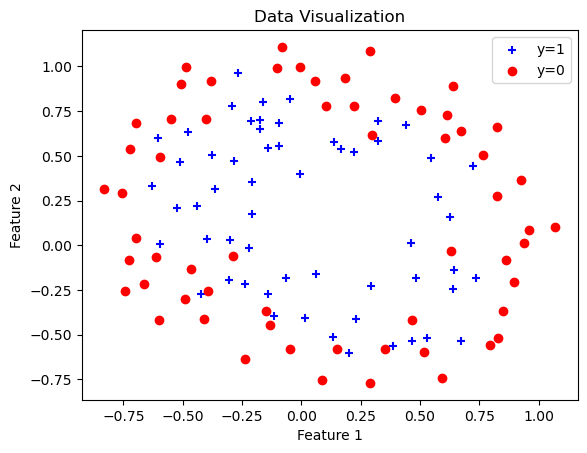

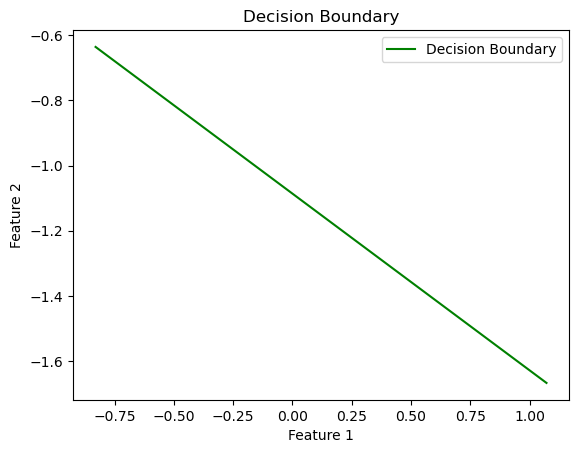

In [43]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [44]:
def predict(X, w, b):
    # Number of samples
    m, n = X.shape
    p = np.zeros(m)
    z = np.dot(X, w) + b
    #as in case of sigmoid function, we use here sigmoid(z)
    p = (z >= 0).astype(int)
    
    return p

In [45]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

Accuracy of training model: 82.051282
